## Heatmap for single file

Header information:
SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                    8 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                 3600 / length of data axis 1                          NAXIS2  =                  200 / length of data axis 2                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy andCOMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.COMMENT   Contact the NASA Science Office of Standards and Technology for the   COMMENT   FITS Definition document #100 and other FITS information.             DATE    = '2025-01-07'         / Time of observation                            CONTENT = '2025/01/07  Radio flux density, e-CALLISTO (ETH)' / Title of image   ORIGIN  = 'Astro   '

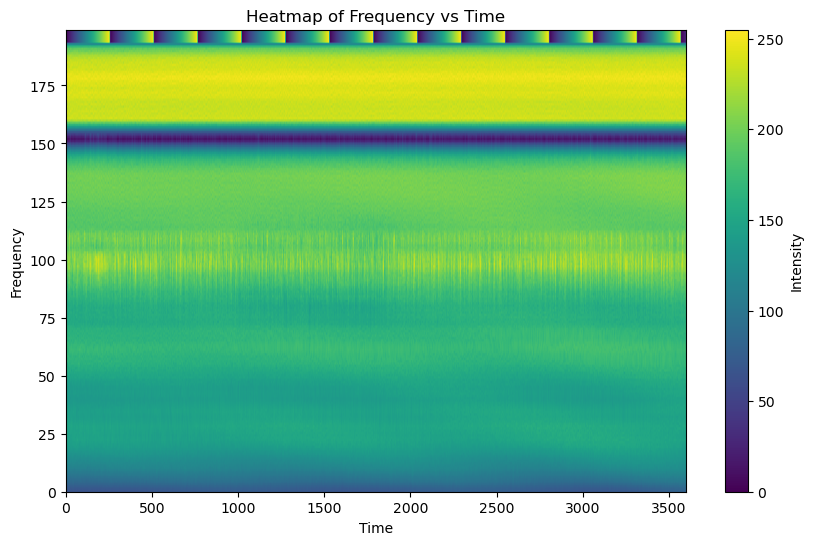

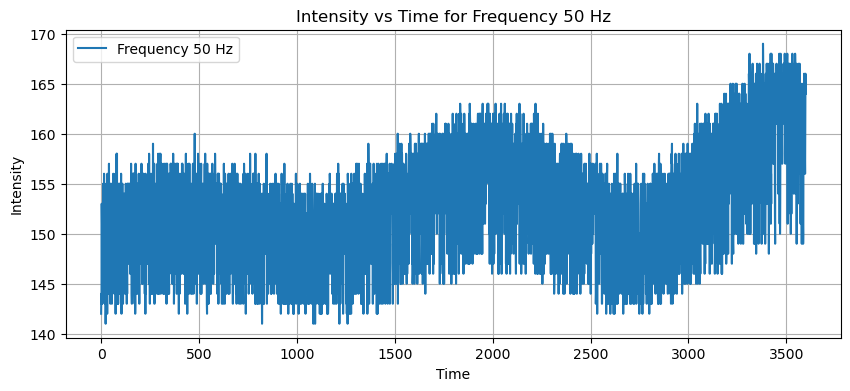

In [2]:
# Import necessary libraries
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

# Load the .fits file
file_path = "sun_meas_25/meas_1/ETH_20250107_110501_01.fit"  # Replace with your actual file path
hdul = fits.open(file_path)

# Display the header information (optional)
print("Header information:")
print(hdul[0].header)

# Access the data (assuming it's a 2D array with shape [frequency, time])
data = hdul[0].data

# Extract frequency and time from header (if provided)
# You may need to adjust these keys based on your file
freq_axis = np.arange(data.shape[0])  # Dummy frequency axis if not provided
time_axis = np.arange(data.shape[1])  # Dummy time axis if not provided

# Close the file
hdul.close()

# Create the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(data, aspect='auto', origin='lower', extent=[time_axis.min(), time_axis.max(), freq_axis.min(), freq_axis.max()], cmap='viridis')
plt.colorbar(label='Intensity')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Heatmap of Frequency vs Time')
plt.show()

# Choose a specific frequency index (modify as needed)
frequency_index = 50  # Example: choose the 50th frequency; adjust as per your data
chosen_frequency = freq_axis[frequency_index]  # Get the actual frequency value if freq_axis is defined

# Plot the intensity of the chosen frequency over time
plt.figure(figsize=(10, 4))
plt.plot(time_axis, data[frequency_index, :], label=f'Frequency {chosen_frequency} Hz')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title(f'Intensity vs Time for Frequency {chosen_frequency} Hz')
plt.legend()
plt.grid(True)
plt.show()


## Heatmap for whole Measurement

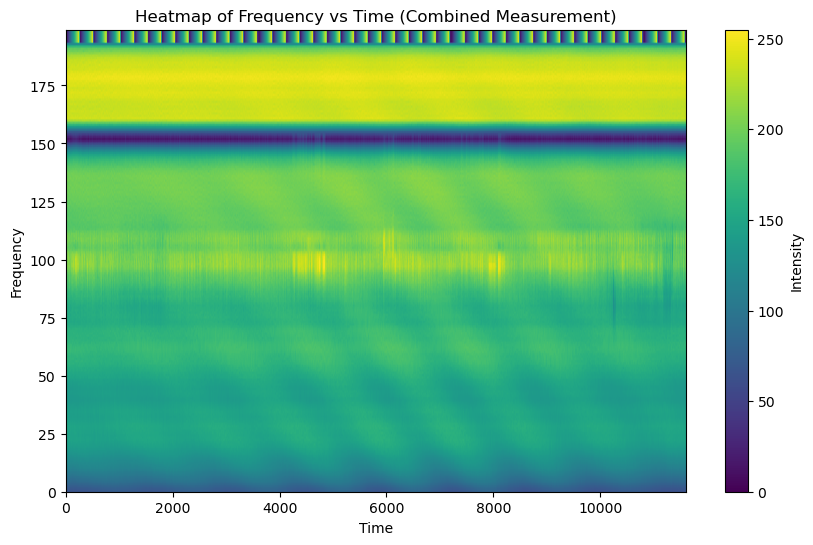

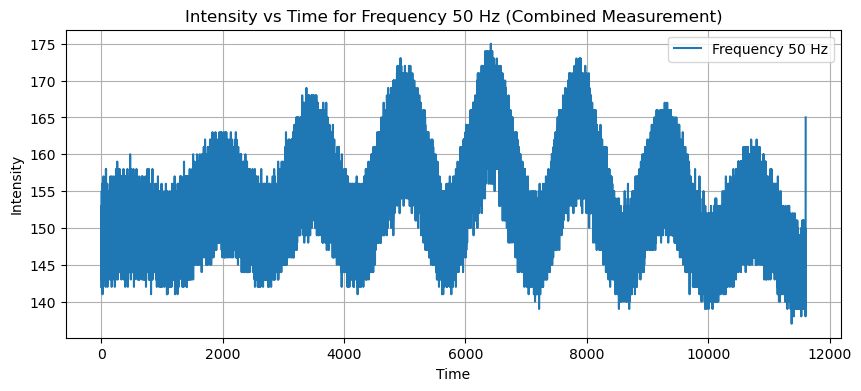

In [1]:
# Import necessary libraries
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import glob

# Specify the directory containing the .fit files (replace with your actual path)
file_dir = "sun_meas_25/meas_1/"
file_paths = sorted(glob.glob(file_dir + "*.fit"))

# Initialize lists to store combined data and time axis
combined_data = []
time_offset = 0  # To manage time axis across multiple files
time_axes = []  # To concatenate time axes properly

# Loop through each .fit file
for file_path in file_paths:
    hdul = fits.open(file_path)
    
    # Access data (assuming it's a 2D array with shape [frequency, time])
    data = hdul[0].data
    
    # Extract time axis (dummy axis if not provided in the header)
    time_axis = np.arange(data.shape[1]) + time_offset
    time_axes.append(time_axis)
    
    # Append data to the combined list
    combined_data.append(data)
    
    # Update time offset for the next file
    time_offset += data.shape[1]
    
    # Close the file
    hdul.close()

# Concatenate all data and time axes
combined_data = np.hstack(combined_data)  # Combine along the time axis
time_axis_combined = np.hstack(time_axes)  # Combined time axis
freq_axis = np.arange(combined_data.shape[0])  # Dummy frequency axis

# Plot the heatmap for the combined data
plt.figure(figsize=(10, 6))
plt.imshow(combined_data, aspect='auto', origin='lower', extent=[time_axis_combined.min(), time_axis_combined.max(), freq_axis.min(), freq_axis.max()], cmap='viridis')
plt.colorbar(label='Intensity')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Heatmap of Frequency vs Time (Combined Measurement)')
plt.show()

# Choose a specific frequency index (modify as needed)
frequency_index = 50  # Example: choose the 50th frequency
chosen_frequency = freq_axis[frequency_index]  # Get the actual frequency value if freq_axis is defined

# Plot the intensity of the chosen frequency over the combined time span
plt.figure(figsize=(10, 4))
plt.plot(time_axis_combined, combined_data[frequency_index, :], label=f'Frequency {chosen_frequency} Hz')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title(f'Intensity vs Time for Frequency {chosen_frequency} Hz (Combined Measurement)')
plt.legend()
plt.grid(True)
plt.show()
